In [7]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

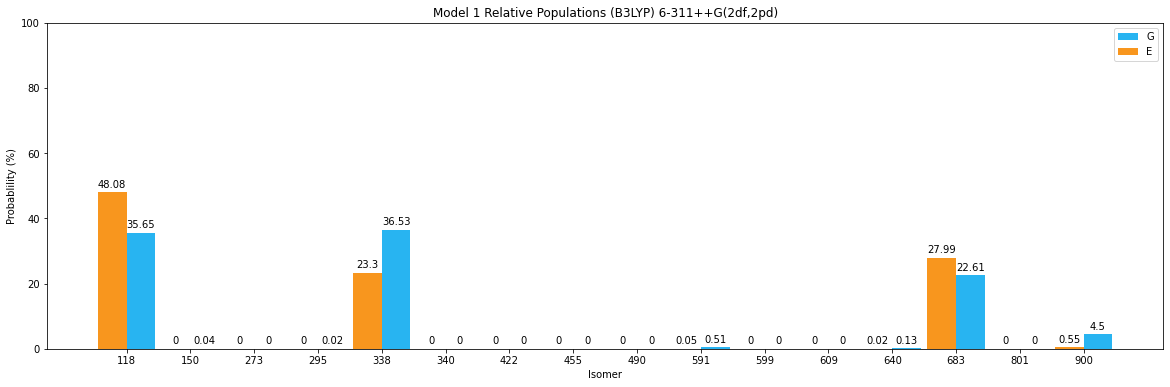

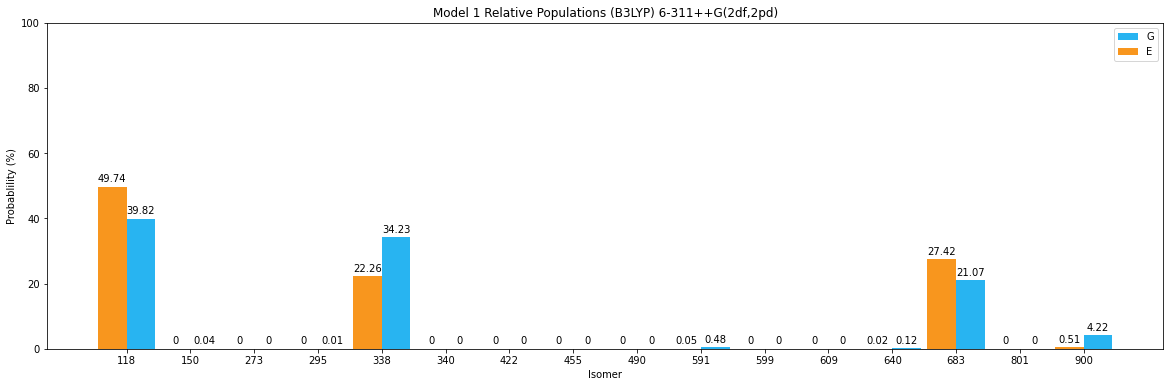

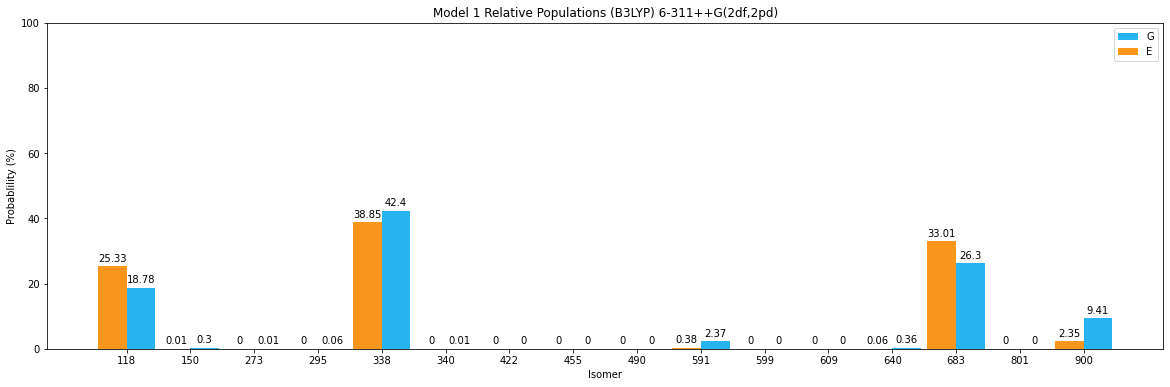

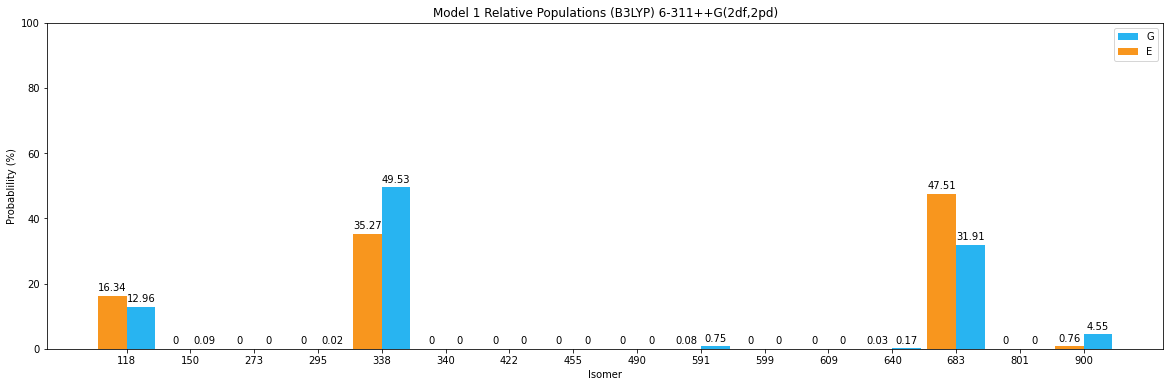

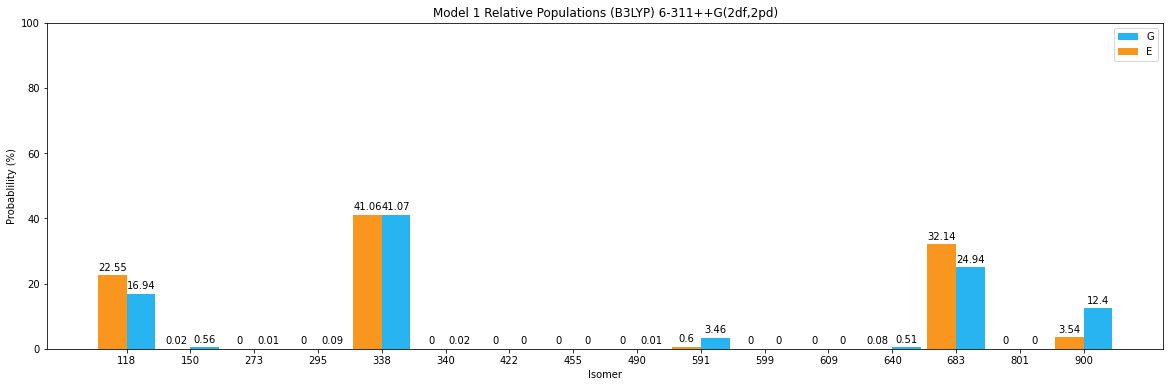

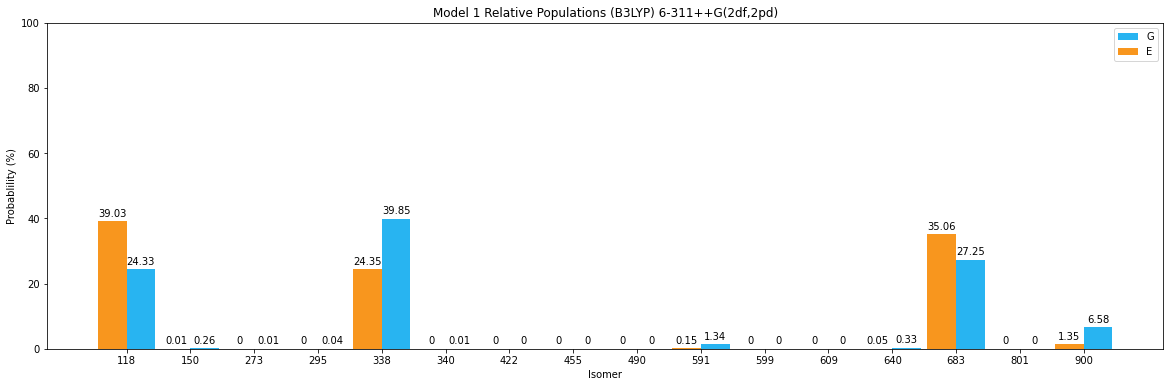

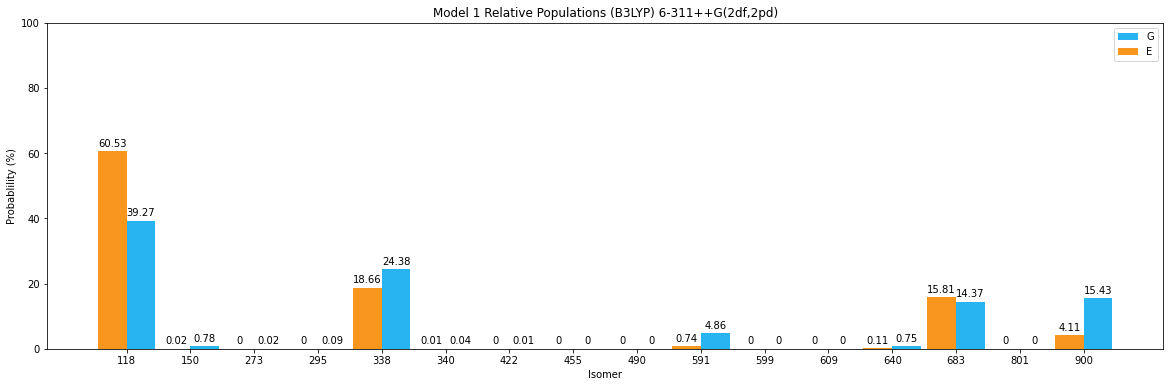

In [9]:
directory = r'model1/b_csv'
for file in os.listdir(directory):
    #print(file)
    filename = os.path.splitext(file)[0]
    #print(filename)

    basis = filename.split("_",2)

    i = 0
    if basis[1] == '0':
        i = '6-31G(d)'
    elif basis[1] == '1':
        i = '6-31G(d,p)'
    elif basis[1] == '2':
        i = '6-31+G(d,p)'
    elif basis[1] == '3':
        i = '6-311G(d,p)'
    elif basis[1] == '4':
        i = '6-311++G(d,p)'
    elif basis[1] == '5':
        i = '6-311G(2df,2pd)'
    else:
        i = '6-311++G(2df,2pd)'
    
    #Read Data
    data_raw = pd.read_csv('model1/b_csv/%s' % file)
    xdata = data_raw*100
    data = xdata.round(2)
    #print(data)
    
    #Data
    isomer = data.isomer
    G = data.G
    E = data.E

    #Aesthetics
    fig = plt.figure(figsize=(20, 6))
    fig.patch.set_facecolor('white')

    #Plotting
    font = {'fontname':'DejaVu Sans',}
    w=0.45

    bar1 = plt.bar(np.arange(len(isomer)), G, w, color='#28b4f1ff', align='edge', label='G')

    bar2 = plt.bar([i-w for i in np.arange(len(isomer))], E, w, color='#f8961eff', align='edge', label='E')

    plt.legend(prop={'size': 10})
 
    #Axes
    ax = plt.gca()
    ax.set_facecolor('#ffffff')
    ax.set_ylim([0,100])
    plt.title('Model 1 Relative Populations (B3LYP) %s' % i, font)
    plt.xlabel('Isomer', font)
    plt.ylabel('Probablility (%)', font)
    plt.xticks(np.arange(16), ['118', '150', '273', '295', '338', '340', '422', '455', '490', '591', '599', '609', '640', '683', '801', '900'])

    #Value Labels
    plt.bar_label(bar1, padding=3)
    plt.bar_label(bar2, padding=3)

    #Show
    plt.savefig('model1/b_plots/%s_model1.png' % basis[1], bbox_inches='tight', dpi=300)
    plt.show()